<a href="https://colab.research.google.com/github/prodigioharshit/Anomaly-Detection/blob/main/ML_problem_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [44]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.0 MB/s 
     |████████████████████████████████| 15.6 MB 403 kB/s 
     |████████████████████████████████| 2.0 MB 55.2 MB/s 
     |████████████████████████████████| 114 kB 48.8 MB/s 
     |████████████████████████████████| 167 kB 51.1 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 
     |████████████████████████████████| 1.7 MB 42.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 37.0 MB/s 
     |████████████████████████████████| 261 kB 48.0 MB/s 
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 3.1 MB 46.9 MB/s 
     |████████████████████████████████| 10.9 MB 40.9 MB/s 
     |████████████████████████████████| 636 kB 57.6 MB/s 
     |█████████████████

In [ ]:
!pip install fbprophet

In [10]:
import fbprophet

In [11]:
fbprophet.__version__

'0.7.1'

In [12]:
from fbprophet import Prophet

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
from scipy.stats import norm
import datetime as dt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
df = pd.read_csv("latency_ship_vsat_10k.csv")
df

,Unnamed: 0,timestamp,Terminal,Latency
0,0,01-10-2021 00:36,MY-StaySalty,384.574850
1,1,01-10-2021 00:55,MY-Abydos,49.141673
2,2,01-10-2021 01:09,Marjorie-c,438.901059
3,3,01-10-2021 01:27,MY-StaySalty,504.779906
4,4,01-10-2021 01:43,MY-Namaste,531.534196
...,...,...,...,...
9994,9994,21-01-2022 22:34,MY-FountainHead1,393.321152
9995,9995,21-01-2022 22:51,MY-StaySalty,513.243977
9996,9996,21-01-2022 23:05,MY-StaySalty,621.389746
9997,9997,21-01-2022 23:15,MY-StaySalty,454.510787


In [28]:
df.drop(df.columns[[0]], axis = 1,inplace=True)
df

,timestamp,Terminal,Latency
0,01-10-2021 00:36,MY-StaySalty,384.574850
1,01-10-2021 00:55,MY-Abydos,49.141673
2,01-10-2021 01:09,Marjorie-c,438.901059
3,01-10-2021 01:27,MY-StaySalty,504.779906
4,01-10-2021 01:43,MY-Namaste,531.534196
...,...,...,...
9994,21-01-2022 22:34,MY-FountainHead1,393.321152
9995,21-01-2022 22:51,MY-StaySalty,513.243977
9996,21-01-2022 23:05,MY-StaySalty,621.389746
9997,21-01-2022 23:15,MY-StaySalty,454.510787


In [29]:
df['timestamp'] = df['timestamp'].astype(str)+":00"
df

,timestamp,Terminal,Latency
0,01-10-2021 00:36:00,MY-StaySalty,384.574850
1,01-10-2021 00:55:00,MY-Abydos,49.141673
2,01-10-2021 01:09:00,Marjorie-c,438.901059
3,01-10-2021 01:27:00,MY-StaySalty,504.779906
4,01-10-2021 01:43:00,MY-Namaste,531.534196
...,...,...,...
9994,21-01-2022 22:34:00,MY-FountainHead1,393.321152
9995,21-01-2022 22:51:00,MY-StaySalty,513.243977
9996,21-01-2022 23:05:00,MY-StaySalty,621.389746
9997,21-01-2022 23:15:00,MY-StaySalty,454.510787


In [30]:
df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst = True)
df

,timestamp,Terminal,Latency
0,2021-10-01 00:36:00,MY-StaySalty,384.574850
1,2021-10-01 00:55:00,MY-Abydos,49.141673
2,2021-10-01 01:09:00,Marjorie-c,438.901059
3,2021-10-01 01:27:00,MY-StaySalty,504.779906
4,2021-10-01 01:43:00,MY-Namaste,531.534196
...,...,...,...
9994,2022-01-21 22:34:00,MY-FountainHead1,393.321152
9995,2022-01-21 22:51:00,MY-StaySalty,513.243977
9996,2022-01-21 23:05:00,MY-StaySalty,621.389746
9997,2022-01-21 23:15:00,MY-StaySalty,454.510787


Removed negative latency

In [31]:
df = df[df['Latency'] > 0]
df

,timestamp,Terminal,Latency
0,2021-10-01 00:36:00,MY-StaySalty,384.574850
1,2021-10-01 00:55:00,MY-Abydos,49.141673
2,2021-10-01 01:09:00,Marjorie-c,438.901059
3,2021-10-01 01:27:00,MY-StaySalty,504.779906
4,2021-10-01 01:43:00,MY-Namaste,531.534196
...,...,...,...
9994,2022-01-21 22:34:00,MY-FountainHead1,393.321152
9995,2022-01-21 22:51:00,MY-StaySalty,513.243977
9996,2022-01-21 23:05:00,MY-StaySalty,621.389746
9997,2022-01-21 23:15:00,MY-StaySalty,454.510787


In [32]:
df.isnull().sum()

timestamp    0
Terminal     0
Latency      0
dtype: int64

In [33]:
# create moving-averages
df['MA48'] = df['Latency'].rolling(48).mean()
df['MA330'] = df['Latency'].rolling(330).mean()

# plot 
fig = px.line(df, x="timestamp", y=['Latency', 'MA48', 'MA330'], title='Anomalies in Latency', template = 'plotly_dark')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df.drop(['MA48', 'MA330'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df

,timestamp,Terminal,Latency
0,2021-10-01 00:36:00,MY-StaySalty,384.574850
1,2021-10-01 00:55:00,MY-Abydos,49.141673
2,2021-10-01 01:09:00,Marjorie-c,438.901059
3,2021-10-01 01:27:00,MY-StaySalty,504.779906
4,2021-10-01 01:43:00,MY-Namaste,531.534196
...,...,...,...
9994,2022-01-21 22:34:00,MY-FountainHead1,393.321152
9995,2022-01-21 22:51:00,MY-StaySalty,513.243977
9996,2022-01-21 23:05:00,MY-StaySalty,621.389746
9997,2022-01-21 23:15:00,MY-StaySalty,454.510787


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
df

,timestamp,Terminal,Latency
0,2021-10-01 00:36:00,MY-StaySalty,384.574850
1,2021-10-01 00:55:00,MY-Abydos,49.141673
2,2021-10-01 01:09:00,Marjorie-c,438.901059
3,2021-10-01 01:27:00,MY-StaySalty,504.779906
4,2021-10-01 01:43:00,MY-Namaste,531.534196
...,...,...,...
9994,2022-01-21 22:34:00,MY-FountainHead1,393.321152
9995,2022-01-21 22:51:00,MY-StaySalty,513.243977
9996,2022-01-21 23:05:00,MY-StaySalty,621.389746
9997,2022-01-21 23:15:00,MY-StaySalty,454.510787


In [38]:
# For Terminal -> MY-StaySalty
df_stay_salty = df[df['Terminal'] == 'MY-StaySalty'][['timestamp','Latency']]
pd.DataFrame(df_stay_salty).head(10)

,timestamp,Latency
0,2021-10-01 00:36:00,384.574850
3,2021-10-01 01:27:00,504.779906
6,2021-10-01 02:07:00,337.021004
9,2021-10-01 03:18:00,513.243977
10,2021-10-01 03:23:00,621.389746
12,2021-10-01 03:39:00,337.178757
19,2021-10-01 04:28:00,426.269348
36,2021-10-01 07:19:00,622.316554
52,2021-10-01 11:10:00,180.761618
61,2021-10-01 13:13:00,716.399922


In [39]:
df_stay_salty.set_index('timestamp',drop=True ,inplace=True)


In [42]:
df_stay_salty.head(10)

,Latency
timestamp,
2021-10-01 00:36:00,384.574850
2021-10-01 01:27:00,504.779906
2021-10-01 02:07:00,337.021004
2021-10-01 03:18:00,513.243977
2021-10-01 03:23:00,621.389746
2021-10-01 03:39:00,337.178757
2021-10-01 04:28:00,426.269348
2021-10-01 07:19:00,622.316554
2021-10-01 11:10:00,180.761618


In [ ]:
df_stay_salty = df_stay_salty.resample('H').sum()

In [ ]:
df_stay_salty.head(10)

,Latency
timestamp,
2021-10-01 00:00:00,384.574850
2021-10-01 01:00:00,504.779906
2021-10-01 02:00:00,337.021004
2021-10-01 03:00:00,1471.812480
2021-10-01 04:00:00,426.269348
2021-10-01 05:00:00,0.000000
2021-10-01 06:00:00,0.000000
2021-10-01 07:00:00,622.316554
2021-10-01 08:00:00,0.000000


In [ ]:
df_stay_salty['day'] = [i.day for i in df_stay_salty.index]
df_stay_salty['day_name'] = [i.day_name() for i in df_stay_salty.index]
df_stay_salty['day_of_year'] = [i.dayofyear for i in df_stay_salty.index]
df_stay_salty['week_of_year'] = [i.weekofyear for i in df_stay_salty.index]
df_stay_salty['hour'] = [i.hour for i in df_stay_salty.index]
df_stay_salty['is_weekday'] = [i.isoweekday() for i in df_stay_salty.index]
df_stay_salty

,Latency,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,
2021-10-01 00:00:00,384.574850,1,Friday,274,39,0,5
2021-10-01 01:00:00,504.779906,1,Friday,274,39,1,5
2021-10-01 02:00:00,337.021004,1,Friday,274,39,2,5
2021-10-01 03:00:00,1471.812480,1,Friday,274,39,3,5
2021-10-01 04:00:00,426.269348,1,Friday,274,39,4,5
...,...,...,...,...,...,...,...
2022-01-21 19:00:00,0.000000,21,Friday,21,3,19,5
2022-01-21 20:00:00,0.000000,21,Friday,21,3,20,5
2022-01-21 21:00:00,0.000000,21,Friday,21,3,21,5


In [ ]:
from pycaret.anomaly import *

In [ ]:
s = setup(df_stay_salty, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(2712, 7)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2712, 35)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results

,Latency,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2021-10-01 00:00:00,384.574850,1,Friday,274,39,0,5,1,0.009456
2021-10-01 01:00:00,504.779906,1,Friday,274,39,1,5,1,0.003178
2021-10-01 02:00:00,337.021004,1,Friday,274,39,2,5,1,0.002221
2021-10-01 03:00:00,1471.812480,1,Friday,274,39,3,5,1,0.019813
2021-10-01 04:00:00,426.269348,1,Friday,274,39,4,5,1,0.001974
...,...,...,...,...,...,...,...,...,...
2022-01-21 19:00:00,0.000000,21,Friday,21,3,19,5,0,-0.002755
2022-01-21 20:00:00,0.000000,21,Friday,21,3,20,5,1,0.002481
2022-01-21 21:00:00,0.000000,21,Friday,21,3,21,5,1,0.002794


In [ ]:
iforest_results[iforest_results['Anomaly'] == 1]

,Latency,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2021-10-01 00:00:00,384.574850,1,Friday,274,39,0,5,1,0.009456
2021-10-01 01:00:00,504.779906,1,Friday,274,39,1,5,1,0.003178
2021-10-01 02:00:00,337.021004,1,Friday,274,39,2,5,1,0.002221
2021-10-01 03:00:00,1471.812480,1,Friday,274,39,3,5,1,0.019813
2021-10-01 04:00:00,426.269348,1,Friday,274,39,4,5,1,0.001974
...,...,...,...,...,...,...,...,...,...
2022-01-21 18:00:00,857.021367,21,Friday,21,3,18,5,1,0.006596
2022-01-21 20:00:00,0.000000,21,Friday,21,3,20,5,1,0.002481
2022-01-21 21:00:00,0.000000,21,Friday,21,3,21,5,1,0.002794


In [ ]:
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=123,
    verbose=0)


In [ ]:
#plot_model(iforest,plot ='umap')

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = px.line(iforest_results, x=iforest_results.index, y="Latency", 
              title='Latency Dataset -> Anomaly Detection', template = 'plotly_dark')

outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index

y_values = [iforest_results.loc[i]['Latency'] for i in outlier_dates]

fig.add_trace(go.Scatter(x = outlier_dates, y = y_values, mode = 'markers',
                         name = 'Anomaly', marker=dict(color='red',size=10)))
fig.show()


IGNORE

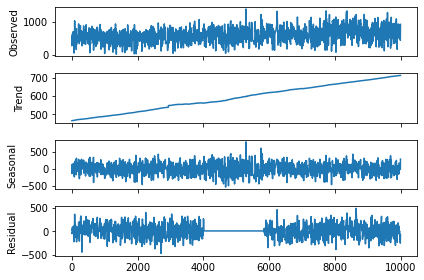

In [ ]:
#analysis = df2[['Latency']].copy()
df_namaste = df[df["Terminal"]=="MY-Namaste"]

decompose_result_mult = seasonal_decompose(df_namaste['Latency'], model="additive",extrapolate_trend = 'freq',freq=1000)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
train = df_namaste[:1500]
test = df_namaste[1500:]

In [ ]:
fitted_model = ExponentialSmoothing(train['Latency'],trend='add',seasonal='add',seasonal_periods=7).fit()
test_predictions = fitted_model.forecast(199)

In [ ]:
train['Latency'].plot(legend=True,label='TRAIN')
test['Latency'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',figsize=(100,50))
plt.title('Train, Test and Predicted Test using Holt Winters')